**Navn på gruppens medlemmer:**

Mikael Bourmistrov

# Om de numeriske øvingene i kvantemekanikk

Målet med de numeriske øvingene i kvantemekanikk er
* å bruke numeriske metoder og visualiseringer for å forstå kvantemekanikk bedre.
* å utvikle en generell "verktøykasse" du kan bruke også når du arbeider med andre øvinger og lærer nytt stoff i faget.
* å se ligningene i kvantemekanikken og løsninger av disse fra et generelt perspektiv.
* å utvikle ferdigheter innen programmering og numerikk.

Vi legger opp til bruk av Python sammen med bibliotekene `numpy`, `scipy` og `matplotlib` for numerikk, vitenskapelige beregninger og plotting.
*Bruk disse for alt de er verdt!*
God bruk av disse bibliotekene vil la deg uttrykke deg mer konsist enn om du kun bruker standard Python-funksjonalitet.
Vi forventer at du selv finner fram til relevant funksjonalitet og dokumentasjon i bibliotekene.
De er alle godt dokumentert på Internett.

Om du selv ønsker å benytte andre programmeringsspråk eller biblioteker, står du fritt til det.
Noen oppgaver inkluderer en liten mengde hjelpekode i Python som du i så fall må omskrive på egen hånd, men de er ellers utformet uten tilknytning til et spesifikt språk.
Vi forventer likevel at du leverer et alternativt, sammenhengende dokument med tekst, kode og resultater som svarer på oppgavene.

I Jupyter Notebook og Jupyter Lab er det mulig å bruke ulike *backends* for plotting med `matplotlib`.
Dette er grovt forklart forskjellige underliggende "motorer" som bestemmer utseende og funksjonaliteten til figurene som produseres.
Avhengig av hvilket av programmene du bruker, vil du erfare at en backend fungerer bedre enn andre.
I Jupyter Notebook fungerer `notebook`-backenden best og uten behov for installasjon av ekstra programvare, men i Jupyter Lab må tillegget [jupyter-matplotlib](https://github.com/matplotlib/jupyter-matplotlib) installeres for å få den optimale `widget`-backenden til å fungere.
Begge programmene støtter også `inline`-backenden uten behov for tilleggsprogramvare, men denne produserer mindre fleksible figurer og bør kun brukes som reserveløsning.
Prøv deg selv fram med backendene foreslått under for å finne den som fungerer best for deg.

In [10]:
# uncomment ONE line to choose matplotlib backend
# if using Jupyter Notebook, use interactive "notebook" backend for best results
# if using Jupyter Lab, use interactive "widget" backend for best results
# if both fail, use static "inline" backend
%matplotlib notebook 
#%matplotlib widget 
#%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

## Kort om fysiske enheter i numeriske beregninger

I numeriske beregninger må vi ta hensyn til den begrensede presisjonen og størrelsen til flyttallene som datamaskinen bruker for å representere relle tall.
I kvantemekanikken møter vi spesielt ofte på Plancks reduserte konstant $\hbar \approx 6.63 \cdot 10^{-34} \text{ Js}$ og gjerne kvadratet $\hbar^2$. Det er i utgangspunktet ingenting i veien for å benytte SI-enheter for alle størrelser som opptrer i disse øvingene. Et alternativ er å benytte [atomære enheter](https://en.wikipedia.org/wiki/Hartree_atomic_units).
Dette enhetssystemet er skreddersydd for beregninger på atomært nivå.
Her er blant annet $\hbar$, elektronmassen $m_e$ og elementærladningen $e$ *definert* til å ha tallverdi $1$.
For eksempel uttrykkes energier som multipler av én hartree, $E_h = \hbar^2 / m_e a_0^2 \approx 4.36 \cdot 10^{-18} \text{ J}$. En annen løsning er å benytte enheter som $\text{nm}$ og $\text{eV}$ for lengder og energier. En hartree tilsvarer ca. 27.2 eV, dvs. det dobbelte av grunntilstandsenergien i hydrogenatomet.

**Velg selv hensiktsmessige enheter til bruk i beregningene, men vær oppmerksom på den begrensede presisjonen til flyttall!**

In [313]:
# Jeg tenker å benytte meg av atomære enheter, siden det virker lettere og mere oversiktlig.
# Videre i denne boksen har jeg skrevet alle nødvendige variablene for oppagavene videre:

##### For oppgave 1 (og videre); Partikkel i boks. ##### 
L = 10       # lengden på intervallet (eller bare en lengde)
N = 750      # itterasjoner, arbitrært
h = 1        # redusert plancks konstant
m = 1        # elektronmassen
a = 10       # antall bølger / grunntilastander av bølger som korisponderer til en verdi av a = 0 til og med 9.
dx = L/N     # itterasjonsvariabel dx

x_space = np.linspace(0,L,N)

##### For oppgave 2 (og videre); Harmonisk oscillator. #####
k = 1
w = 1         # som er det samme som sqrt(k/m) altså omega

x_space_harmonic = np.linspace(-L, L, N)

##### For oppgave 3 ; Partikkel i endelige brønnpotensialer. #####
V_0 = -2

# Numerisk løsning av den tidsuavhengige Schrödingerligningen

Å løse den tidsuavhengige Schrödingerligningen
$$ \hat{H} \psi = -\frac{\hbar^2}{2 m} \psi'' + V \psi = E \psi, $$
dvs. å bestemme energiegenverdier $E$ og tilhørende energiegenfunksjoner $\psi(x)$ for et gitt potensial $V(x)$, er et sentralt problem i kvantemekanikken. Dette er ofte ingen enkel oppgave.
Selv for potensialer som gir ligningen analytiske løsninger, kreves det ofte betydelig innsats og bruk av spesielle teknikker for å komme fram til disse.
Vi skal her se på en elegant og generell teknikk for å løse ligningen numerisk for et vilkårlig potensial (i én dimensjon).

Numeriske løsningsmetoder innebærer alltid en viss avgrensning og diskretisering for å gjøre problemet endelig og håndterlig for en datamaskin. Vi avgrenser her delen av rommet vi ser på til å ligge mellom to endepunkter $x_0$ og $x_{N+1}$ og deler opp intervallet mellom dem i punktene $x_0, x_1, \ldots, x_N, x_{N+1}$ med lik avstand $\Delta x$ mellom hvert punkt.
Utenfor dette området definerer vi potensialet til $V(x \leq x_0) = V(x \geq x_{N+1}) = \infty$, slik at $\psi(x \leq x_0) = \psi(x \geq x_{N+1}) = 0$ og det kun er bølgefunksjonens verdier på rutenettet $\boldsymbol{x} = [x_1, \ldots, x_N]^T$ som er ukjente og av interesse.
Til hvert punkt tilordner vi verdiene $\psi_i = \psi(x_i)$ og $V_i = V(x_i)$ til energiegenfunksjonene og potensialet, og vi refererer til verdiene av funksjonene i alle punktene ved hjelp av vektorene $\boldsymbol{V} = [V_1, \ldots, V_N]^T$ og $\boldsymbol{\psi} = [\psi_1, \ldots, \psi_N]^T$.

En intuitiv og enkel tilnærming av den deriverte til en funksjon er den sentrale differansen
$$ \psi'(x) = \frac{\psi(x + \Delta x / 2) - \psi(x - \Delta x / 2)}{\Delta x} $$
Om vi bruker denne tilnærmingen to ganger, kan vi også tilnærme den andrederiverte som
$$ \psi''(x) = \frac{\psi'(x + \Delta x / 2) - \psi'(x - \Delta x / 2)}{\Delta x} = \frac{\psi(x + \Delta x) - 2 \psi(x) + \psi(x - \Delta x)}{\Delta x^2}$$

Ved å sette denne tilnærmingen inn i den tidsuavhengige Schrödingerligningen, kan vi tilnærme den numerisk som
$$-\frac{\hbar^2}{2 m} \frac{\psi_{i+1} - 2 \psi_i + \psi_{i-1}}{{\Delta x}^2} + V_i \psi_i = E \psi_i \qquad \text{for}\,\, i = 1, 2, \ldots, N$$

Vi kan uttrykke denne ligningen på en elegant måte ved å innføre $N \times N$-Hamiltonmatrisen $H$ med elementer
$$ H_{i j} = \begin{cases} 
    \hbar^2 / (m \Delta x^2) + V_i & \text{for} \,\, i = j         & \text{(på diagonalen)}        \\ 
    -\hbar^2 / (2 m \Delta x^2)    & \text{for} \,\, i = j \pm 1   & \text{(på semidiagonalene)}   \\
    0                              & \text{ellers}                                                 \\
\end{cases} $$
og benytte oss av vektoren $\boldsymbol{\psi} = [\psi_1, \ldots, \psi_N]^T$.
Den tar da formen
$$ H \boldsymbol{\psi} = E \boldsymbol{\psi} $$
Energiene $E$ og energiegenfunksjonene $\boldsymbol{\psi}$ er dermed egenverdier og egenvektorer til matrisen $H$!

Numerikkbiblioteker har funksjonalitet for å finne egenverdier og egenvektorer til vilkårlige matriser.
De har gjerne også spesialiserte funksjoner som gjør dette mer effektivt for matriser med en spesiell form, for eksempel som den *tridiagonale* (samt reelle og symmetriske) formen til matrisen $H$.

**Skriv en funksjon som beregner og returnerer alle energiegenverdier $E$ og tilhørende energiegenfunksjoner $\boldsymbol{\psi}$ for en partikkel med masse $m$ som befinner seg i et gitt potensial $\boldsymbol{V}$ på rutenettet $\boldsymbol{x}$. Normér energiegenfunksjonene i forstanden $\int |\psi|^2 \mathrm{d}x$ = 1.**

In [314]:
def energylevels(V, harmonic = False):
    
    H = np.identity(N) # Lager en indentitesmatrise med størrelse N x N, lettere og raskere enn å lage en null-matrise manuelt, senere setter vi enerene til andre verdier uansett
    
    dx_temp = dx
    
    if harmonic:
        dx_temp = 2*dx
        
    for i in range(N):
        H[i][i] = ((h**2)/(m*dx_temp**2)) + V[i] # Vi setter her hvert element hvor i = j i H_ij lik oppgitte funksjon
        
        if i > 0:                         # Vi setter hvert element i H_ij hvor i = j - 1 (altså for hvert punkt i diagonalen, 
            H[i][i-1] = -(h**2)/(2*m*dx_temp**2) # bare én opp) lik den andre funksjonen for alle verdier der i > 0.
            
        if i+1 < N:                      # Vi setter hvert element i H_ji hvor i = j + 1 (altså for hvert punkt i diagonalen,
            H[i][i+1] = -(h**2)/(2*m*dx_temp**2) # bare én ned) lik den andre funskjonen for alle verdier der i + 1 < N.
            
    H_evals, H_efunk = np.linalg.eigh(H)  # En funskjon jeg fant på nett som vil returenere eigenverdiene til matrisen (H_evals), og tilhørende "funskjoner" (eigenvektorer) til de eigenveriene (H_efunk) 
    
    for j in range(N):
        H_efunk[j] = (H_efunk[j]/np.sqrt((np.sum(np.abs(H_efunk[j])**2)*dx_temp))) # Her normaliserer jeg. 
    
    return H_evals, H_efunk.T  # For senere oppgave transponerer jeg eigenvektorene 

I resten av øvingen skal vi rett og slett bare bruke denne numeriske løsningsmetoden på en rekke forskjellige potensialer.
I noen av eksemplene skal vi også sammenligne de numeriske verdiene med analytiske resultater.
For å gjøre denne prosessen så enkel som mulig, foreslår vi at du her skriver én "ultimat" plottefunksjon som du kan gjenbruke i alle disse oppgavene.

**Skriv en funksjon som framstiller potensialet $\boldsymbol{V}$, energiegenverdier $E$ og energiegenfunksjoner $\boldsymbol{\psi}$ (eller absoluttkvadratene $|\boldsymbol{\psi}|^2$) på rutenettet $\boldsymbol{x}$ grafisk. Funksjonen skal også kunne brukes til å sammenligne to sett med (numeriske og analytiske) energier og energiegenfunksjoner.**

**Gjør gjerne dette parallelt med resten av oppgavene, slik at du kan tilpasse framstillingen basert på behovene som oppstår. Se gjerne i forelesningsnotater, bøker og søk rundt på Internett for å få litt inspirasjon til hvordan framstillingen kan gjøres.**

In [315]:
def quantum_plot(H_evals, H_efunk, x_space, V, name):
    
    plt.figure()
    plt.xlabel('x')
    plt.ylabel("Energi [Hartree = $4.36 \cdot 10^{-18} J$]")
    plt.title(name)
    
    for i in range(a):
        energy = np.ones(N) * H_evals[i]                       # energinivå for bølgene
        plt.plot(x_space, (np.abs(H_efunk[i]))**2 + energy[i]) # plusser med energy her får å få bølgene på forskjellig posisjoner
        plt.plot(x_space, energy)                              # energien plottet, altså rette streker for basen av bølgene
        plt.plot(x_space, V)                                   # potensialet plottet, så kan man for eks se brønnene i oppgave 3
        plt.ylim(H_evals[0]-0.5, H_evals[a-1]+1) 
    
    plt.plot(x_space, V)
    plt.show()

## Partikkel i boks

Et av de første kvantemekaniske problemene vi støter på er partikkel i boks.
Her er potensialet, de normerte energiegenfunksjonene og energiegenverdiene
$$
V(x) = \begin{cases}0 & \text{for}\,\, 0 \leq x \leq L \\ \infty & \text{ellers} \end{cases},
\quad \psi(x) = \sqrt{\frac{2}{L}} \sin{\frac{n \pi x}{L}}, 
\quad E = \frac{n^2 \pi^2 \hbar^2}{2 m L^2},
\quad \quad n = 1, 2, \ldots,
$$

**Sammenlign numeriske og analytiske verdier for noen energier og energiegenfunksjoner for et elektron i en boks grafisk.**

**Hvordan er spredningen i energinivåene?**

<IPython.core.display.Javascript object>


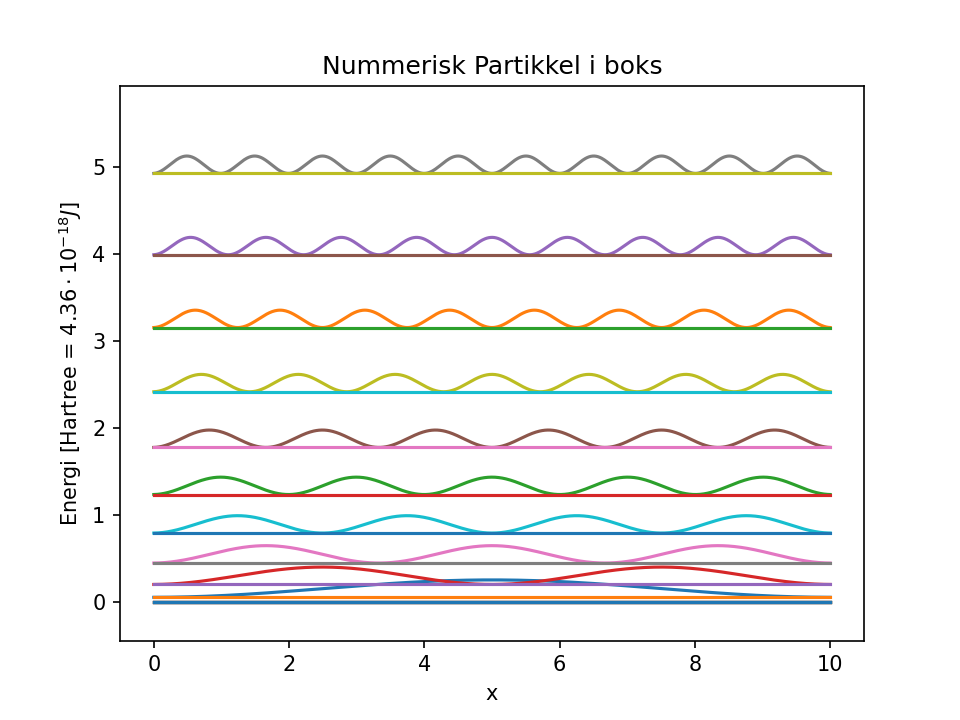

<IPython.core.display.Javascript object>


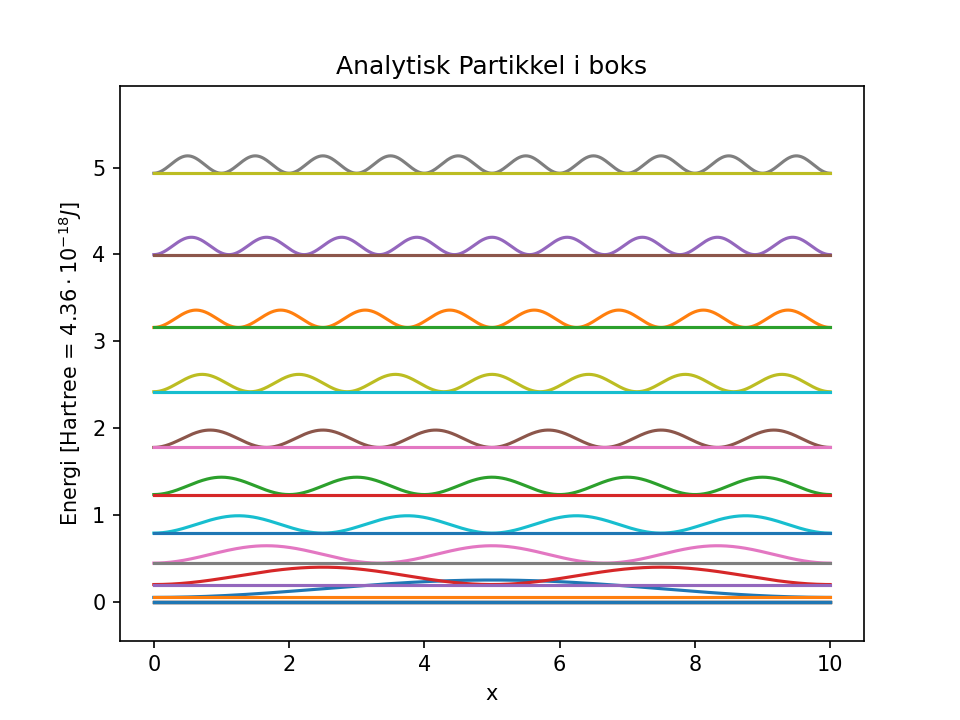

In [316]:
###### Oppgave 1 ######
###### Nummerisk #######
V_1 = np.zeros(N)                          #
H_evals_1, H_efunk_1 = energylevels(V)     # Kaller de 1, siden dette er første oppgave

###### Analytisk #######
energy_analytical_1 = np.zeros(N)
psi_analytical_1 = np.zeros([N,N])

for n in range(N):
    energy_analytical_1[n] = ((n+1)**2*np.pi**2*h**2/2/m/L**2)
    
    for x in range(N):
        psi_analytical_1[n][x] = (np.sqrt(2/L)*np.sin((n+1)*np.pi*(x_space[x])/L))

###### Plotting #######      
        
quantum_plot(H_evals_1, H_efunk_1, x_space, V_1, "Nummerisk Partikkel i boks") # Nummerisk plotting
quantum_plot(energy_analytical_1, psi_analytical_1, x_space, V_1, "Analytisk Partikkel i boks") # Analytisk plotting

## Harmonisk oscillator

Et annet standard kvantemekanisk problem er den harmoniske oscillatoren med
$$
V(x) = \frac{1}{2}m \omega^2 x^2,
\quad \psi(x) = \frac{1}{\sqrt{2^n n!}} \cdot \left(\frac{m \omega}{\pi \hbar}\right)^{1/4} \cdot \exp{\left(-\frac{m \omega x^2}{2 \hbar}\right)} \cdot H_n\left(\sqrt{\frac{m \omega}{\hbar}}x\right),
\quad E = \left(n+\frac{1}{2}\right)\hbar \omega,
\quad \quad n = 0, 1, 2, \ldots
$$
Funksjonene $H_n(y)$ (med dimensjonsløs $y$) kalles [(fysikerens) Hermitepolynomer](https://en.wikipedia.org/wiki/Hermite_polynomials).
De er tilgjengelige i numerikkbiblioteker, men kan også beregnes fra rekursjonsrelasjonen
$$ H_n(x) = 2 x H_{n-1}(x) - 2 (n-1) H_{n-2}(x), \quad H_0(x) = 1, \quad H_1(x) = 2 x$$

Den harmoniske oscillatoren er spesielt interessant i topartikkelsystemer, der et problem med for eksempel to atomer med masse $m_1$ og $m_2$ i et toatomig molekyl reduseres til et ekvivalent enpartikkelproblem med *redusert masse* $m = m_1 m_2 / (m_1 + m_2)$.
Sammen med konstanten $\omega$ utgjør denne et mål på en fjærkonstant som beskriver vibrasjonsbevegelsen mellom de to atomene.

**Sammenlign numeriske og analytiske verdier for noen energier og energiegenfunksjoner i en harmonisk oscillator grafisk.**

**Hvordan er spredningen i energinivåene?**

<IPython.core.display.Javascript object>


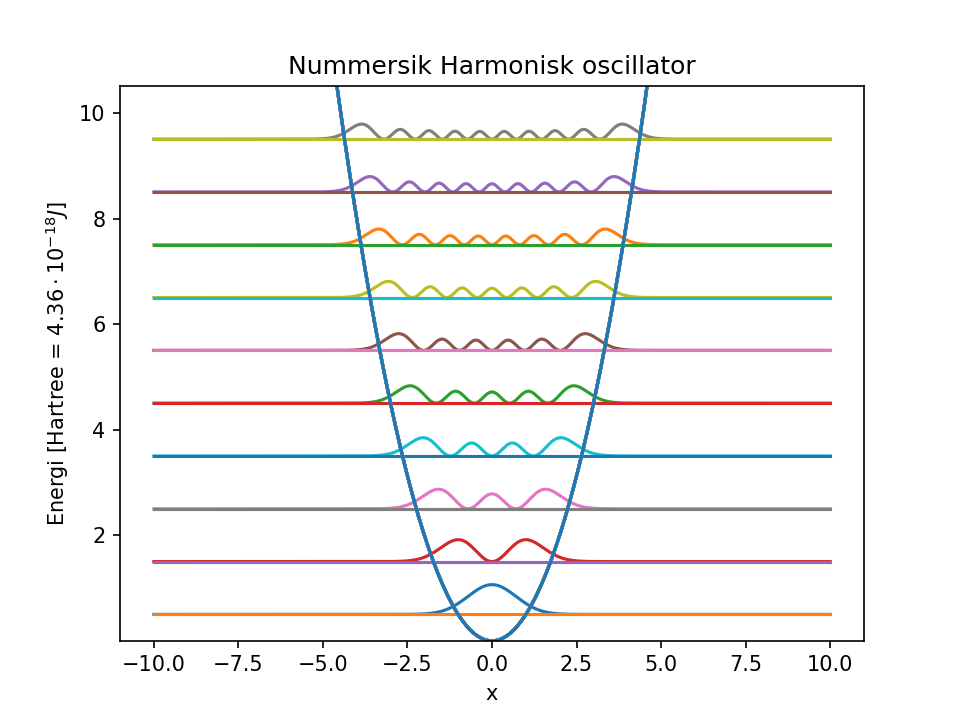

<IPython.core.display.Javascript object>


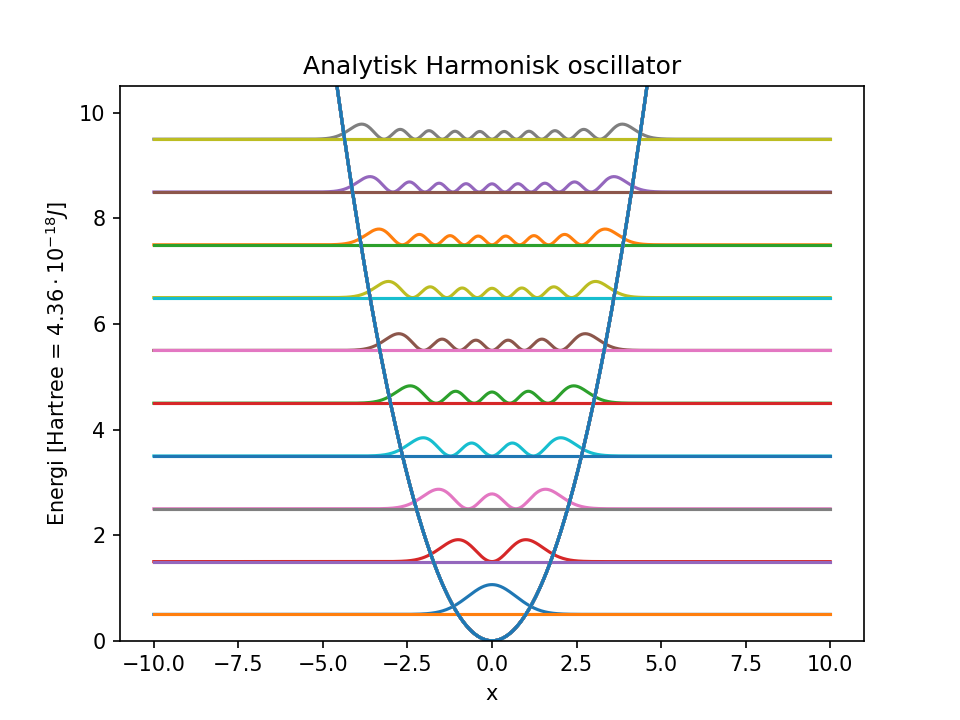

In [317]:
###### Oppgave 2 ######
###### Nummerisk #######
V_2 = 1/2*m*w**2*x_space_harmonic**2           # Kaller de 2, siden dette er andre oppgave
H_evals_2, H_efunk_2 = energylevels(V_2, True) # True her er ment som at den er harmonisk så dx = 2dx og x e [-L, L]

###### Analytisk #######
energy_analytical_2 = np.zeros(N)
psi_analytical_2 = np.zeros([N,N])

def hermite(x, n):
    hermite = np.zeros(a)
    
    hermite[0] = 1
    hermite[1] = 2*x
    
    for i in range(2, n+1):
        hermite[i] = 2*x*hermite[i-1] - 2*(i-1)*hermite[i-2]
        
    return hermite[n]

for n in range(a):
    energy_analytical_2[n] = ((n+1/2)*h*w)
    
    for x in range(N):
        psi_analytical_2[n][x] = (1/(np.sqrt((2**n)*np.math.factorial(n))))*(m*w/np.pi*h)**(1/4)*np.exp((-(m*w*x_space_harmon[x]**2))/(2*h))*hermite(x_space_harmonic[x], n)
        
###### Plotting #######
quantum_plot(H_evals_2, H_efunk_2, x_space_harmonic, V_2, "Nummersik Harmonisk oscillator") # Nummerisk plotting
quantum_plot(energy_analytical_2, psi_analytical_2, x_space_harmonic, V_2, "Analytisk Harmonisk oscillator") # Analytisk plotting

## Partikkel i endelige brønnpotensialer

Et tredje velkjent eksempel er enkeltbrønnen
$$V(x) = \begin{cases}
-V_0 & \text{for}\,\, 0 < x < w \\ 
0   & \text{ellers}
\end{cases}$$
med bredde $w$ og brønndybde $V_0 > 0$.
I dette potensialet finnes ingen analytiske løsninger for de bundne stasjonære tilstandenes energiegenverdier.

Enkeltbrønnen kan generaliseres til et potensial bestående av $N_w$ slike enkeltbrønner plassert ved siden av hverandre med en fast avstand $g$ mellom hver brønn.
Med første brønn i $x = 0$, kan vi uttrykke det sammensatte brønnpotensialet stykkevis som

$$V(x) = \begin{cases}
0    & \text{for}\,\, x < 0 \,\, \text{og} \,\, x > N_w (w + g) & \text{(utenfor brønnområdet)} \\
-V_0 & \text{for}\,\, \frac{x}{w+g} - \left\lfloor \frac{x}{w+g} \right\rfloor < \frac{w}{w+g} & \text{(i brønnene)} \\
0    & \text{ellers} & \text{(mellom brønnene)} \\
\end{cases}$$

Dette er en enkel modell for det periodiske potensialet som et elektron opplever i et fast stoff med en regulær krystallinsk struktur, for eksempel et metall.

**Framstill de bundne tilstandene for et elektron både i en enkeltbrønn og i et sammensatt potensial bestående av mange brønner grafisk. Legg inn et passe stort område med $V = 0$ på begge sider av brønnområdet.**

**Hvordan distribueres energinivåene i potensialet bestående av mange brønner sammenlignet med enkeltbrønnen? Kan du ut fra dette forklare hva vi mener med *energibåndstrukturen* til et fast stoff ved hjelp av begrepene *båndbredde* og *båndgap*?**

<IPython.core.display.Javascript object>


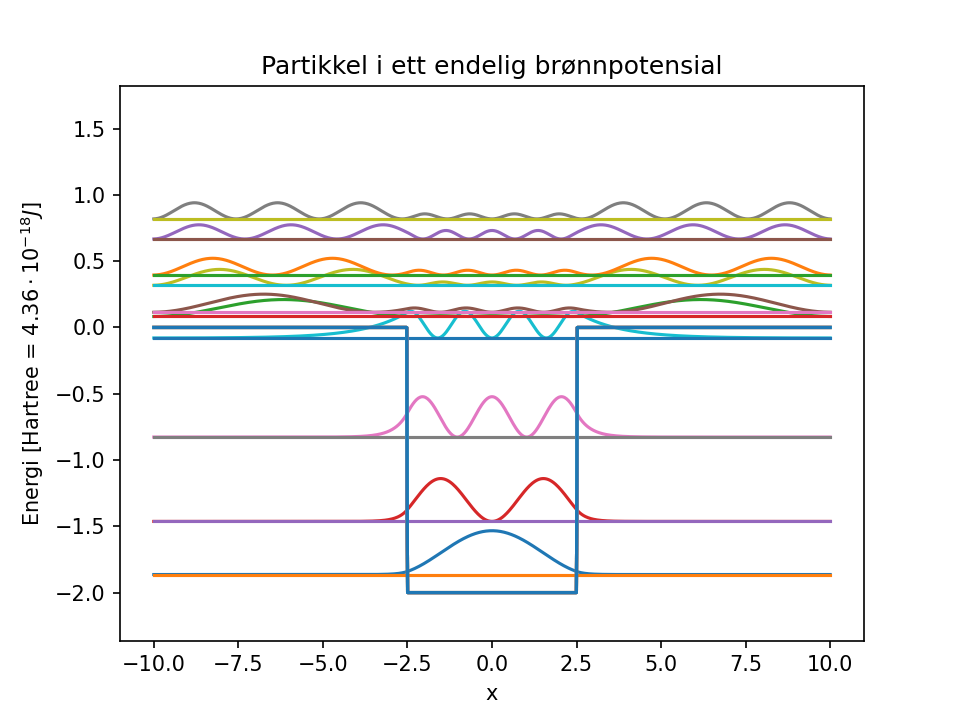

<IPython.core.display.Javascript object>


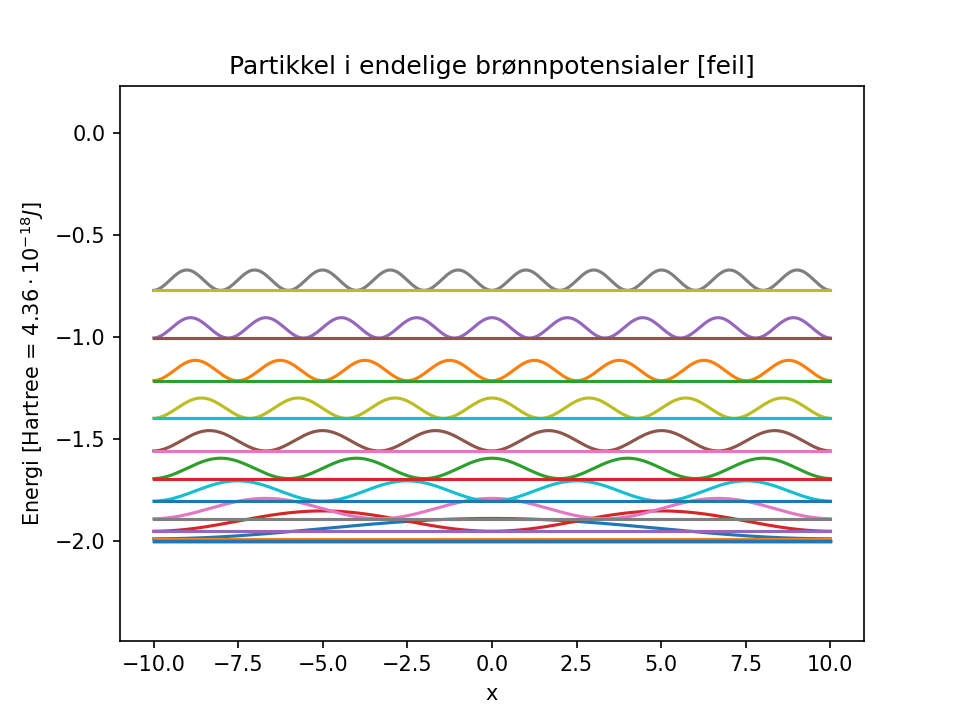

In [332]:
###### Oppgave 3 ######
g = 2   # avstand mellom brønnene
w_b = 5 # brønnebredde
w_a = 0  # brønnemengde
V_0 = -2

##### For én brønn ######
V_3_1 = np.zeros(N)

for i in range(len(x_space_harmonic)):
    if np.abs(x_space_harmonic[i]) < 1/2*w_b:
            
            V_3_1[i] = V_0
            
H_evals_3_1, H_efunk_3_1 = energylevels(V_3_1, True)
            
###### For flere brønner ####   # Fikk ikke til å lage en generell funksjon som bruker g, w_b og W_a
            
V_3_2 = np.zeros(N)  

for i in range(len(x_space_harmonic)):
    
    if (x_space_harmonic[i]/(w_b+g) - np.abs(x_space_harmonic[i]/(w_b+g))) < (w_b/(w_b+g)):
            
        V_3_2[i] = V_0
            
H_evals_3_2, H_efunk_3_2 = energylevels(V_3_2, True)


###### Plotting #######
quantum_plot(H_evals_3_1, H_efunk_3_1, x_space_harmonic, V_3_1, "Partikkel i ett endelig brønnpotensial")
quantum_plot(H_evals_3_2, H_efunk_3_2, x_space_harmonic, V_3_2, "Partikkel i endelige brønnpotensialer [feil]")